In [1]:
import os
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.colors as cs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

먼저 예제코드 사용.
사진 하나를 임포트하고, 사진 전처리-k-means, 중심점 색깔과

In [2]:
work_path = r'C:\Users\Nyoths\Desktop\onestory_color_k-mean\판타지'
os.chdir(work_path)

In [3]:
dir_file_name = os.listdir()
print(dir_file_name[:5])

['18번째 달.jpg', '30일의 약혼녀(웹툰).jpg', '9레벨의 열람요원.jpg', 'B급 히어로.jpg', 'G 혼자만 레벨업.jpg']


In [4]:
#set path to image
imgpath = dir_file_name[0]
#set number of cluster for kmeans
clusterno = 5


img_array = np.fromfile(imgpath, np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

#read image - 한글 파일명 제대로 못읽어서 다음처럼 구성.
#img = cv2.imread(imgpath)

In [5]:
print(img[:3])

[[[ 16  15  17]
  [ 16  15  17]
  [ 15  14  16]
  ...
  [246 233 217]
  [249 235 223]
  [246 234 222]]

 [[ 16  15  17]
  [ 16  15  17]
  [ 15  14  16]
  ...
  [244 231 217]
  [250 236 224]
  [247 235 223]]

 [[ 16  15  17]
  [ 15  14  16]
  [ 15  14  16]
  ...
  [248 235 221]
  [255 243 231]
  [255 243 231]]]


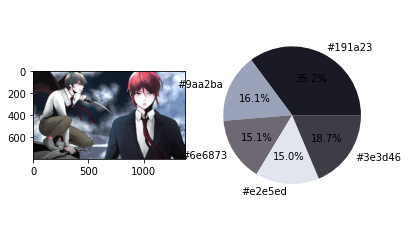

C:\Users\Nyoths\anaconda3\lib\site-packages\pandas\core\internals\construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,0
0,"[[#191a23, #9aa2ba, #6e6873, #e2e5ed, #3e3d46]]"
1,"[387038, 177569, 165937, 164952, 205304]"


In [6]:
#convert bgr to rgb
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#reshape img array
n_img = np.reshape(img,(img.shape[0]*img.shape[1],3))

#use kmeans to find cluster of color
clt = KMeans(n_clusters=clusterno)
clt.fit(n_img)

#get unique value of labels in kmeans
labels = np.unique(clt.labels_)

#find the pixel numbers of each color that is set by cluster number
hist,_ = np.histogram(clt.labels_,bins=np.arange(len(labels)+1))

#declare list to hold color to be used in chart
colors = []

#declare list to hold hex color code for labeling in chart
hexlabels = []

#get the main color
for i in range(clt.cluster_centers_.shape[0]):
  colors.append(tuple(clt.cluster_centers_[i]/255))
  hexlabels.append(cs.to_hex(tuple(clt.cluster_centers_[i]/255)))

#create pie chart for color
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.pie(hist,labels=hexlabels,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

pd.DataFrame([np.array(hexlabels).reshape(1,5), hist])

In [7]:
clt.cluster_centers_

array([[ 25.07329814,  26.45818927,  35.19322759],
       [154.12059502, 161.58659805, 185.65310163],
       [109.57645837, 103.87869057, 115.12435252],
       [226.4692731 , 228.57897259, 237.30618906],
       [ 61.84205315,  60.86997209,  69.64614489]])

정상적으로 돌아가는것을 확인했으므로
이제부터 데이터 프레임화 진행예정.

데이터 프레임화 작업이면 이 아래만 실행시키면 문제없다.


# 비율
hist/sum(hist)

In [8]:
work_path = r'C:\Users\Nyoths\Desktop\onestory_color_k-mean'
os.chdir(work_path)
# BL은 시작경로, 그 뒤는 이 순서대로 상대경로로 바꿔가며 진행
dir_list = ['./BL','../개그', '../드라마', '../순정', '../스릴러', '../액션', '../일상', '../판타지']

# K-means의 K 크기.
k_size = 5

data_list = []

for dir in dir_list:
  os.chdir(dir)
  cur_categori = dir.split('/')[-1]
  print(f'{cur_categori} 장르 작업중입니다. 현재 작업경로는 : {os.getcwd()} 입니다')

  dir_file_name = os.listdir()
  print(f'경로의 최상단 파일명 5개 : {dir_file_name[:5]}')

  #set path to image
  for imgpath in tqdm(dir_file_name):
    # import image file
    img_array = np.fromfile(imgpath, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

    #convert bgr to rgb
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    #reshape img array
    n_img = np.reshape(img,(img.shape[0]*img.shape[1],3))

    #use kmeans to find cluster of color
    clt = KMeans(n_clusters=k_size)
    clt.fit(n_img)

    #get unique value of labels in kmeans
    labels = np.unique(clt.labels_)

    #find the pixel numbers of each color that is set by cluster number
    hist,_ = np.histogram(clt.labels_,bins=np.arange(len(labels)+1))

    #declare list colors, hexlabels
    colors = []
    hexlabels = []

    #get the main color
    for i in range(clt.cluster_centers_.shape[0]):
      colors.append(tuple(clt.cluster_centers_[i]/255))
      hexlabels.append(cs.to_hex(tuple(clt.cluster_centers_[i]/255)))

    df = pd.DataFrame(hexlabels,hist).sort_index(ascending=False)
    # total num of cluster and calculate tot_num to rates
    val = [i/sum(list(df.index)) for i in list(df.index)]
    # labels
    lab = list(df[0])
    # make lab-rate-list
    lab.extend(val)
    # print examples : print(lab) = ['#1a1b24', '#3f3e47', '#9aa2ba', '#e2e4ed', '#6e6874', 392342, 202711, 176624, 165348, 163775]
    # 1st-5nd colors and rates data

    # 제목, 카테고리 데이터.
    temp = [imgpath.split('.')[0], cur_categori]

    # hex_code와, 비율 추가.
    temp.extend(lab)
    temp.append(imgpath)

    # 데이터 프레임에 한줄 추가.
    data_list.append(temp)


top5_col_dataset = pd.DataFrame(data_list,columns=['제목', '카테고리', 'hex1','hex2','hex3','hex4','hex5',
                                                   'hex1rate','hex2rate','hex3rate','hex4rate','hex5rate','file_path'])

BL 장르 작업중입니다. 현재 작업경로는 : C:\Users\Nyoths\Desktop\onestory_color_k-mean\BL 입니다
경로의 최상단 파일명 5개 : ['4와 2분의 1 정거장.jpg', 'BL의 정석.jpg', 'Not so bad(낫 소 배드).jpg', 'Take on Me.jpg', '[BL] 새비지 가든 [일반판].jpg']


100%|██████████| 200/200 [08:14<00:00,  2.47s/it]


개그 장르 작업중입니다. 현재 작업경로는 : C:\Users\Nyoths\Desktop\onestory_color_k-mean\개그 입니다
경로의 최상단 파일명 5개 : ['35세 강무열.jpg', '갓진상.jpg', '고양이툰.jpg', '그 시절에도 피어오르던 취향.jpg', '그녀의 레시피.jpg']


100%|██████████| 43/43 [01:20<00:00,  1.87s/it]


드라마 장르 작업중입니다. 현재 작업경로는 : C:\Users\Nyoths\Desktop\onestory_color_k-mean\드라마 입니다
경로의 최상단 파일명 5개 : ['Bloody Chain.jpg', 'hang.jpg', 'iMood.jpg', 'No 고양이 No 라이프 우리들의 지역 고양이 계획.jpg', 'The tale.jpg']


100%|██████████| 200/200 [19:40<00:00,  5.90s/it]


순정 장르 작업중입니다. 현재 작업경로는 : C:\Users\Nyoths\Desktop\onestory_color_k-mean\순정 입니다
경로의 최상단 파일명 5개 : ['17세, 오늘부터 동거 시작합니다!.jpg', '28살, 5명의 남자와 연애시작!.jpg', 'Sugar Sugar Honey(슈가 슈가 허니).jpg', '_밤_을 찾아서.jpg', '가시성의 왕자님.jpg']


100%|██████████| 200/200 [22:02<00:00,  6.61s/it]


스릴러 장르 작업중입니다. 현재 작업경로는 : C:\Users\Nyoths\Desktop\onestory_color_k-mean\스릴러 입니다
경로의 최상단 파일명 5개 : ['17층.jpg', 'The Isle.jpg', '갈피.jpg', '거미줄.jpg', '공포실화[완전판].jpg']


100%|██████████| 46/46 [01:07<00:00,  1.47s/it]


액션 장르 작업중입니다. 현재 작업경로는 : C:\Users\Nyoths\Desktop\onestory_color_k-mean\액션 입니다
경로의 최상단 파일명 5개 : ['10만 년째 오늘을 살던 놈.jpg', '8만 년 만에 회귀하다.jpg', 'Go On, HERO.jpg', 'Retry 다시 한번 최강 신선으로.jpg', 'SSS급으로는 부족했다.jpg']


100%|██████████| 199/199 [19:39<00:00,  5.93s/it]


일상 장르 작업중입니다. 현재 작업경로는 : C:\Users\Nyoths\Desktop\onestory_color_k-mean\일상 입니다
경로의 최상단 파일명 5개 : ['CAT (캣).jpg', '국립자유경제고등학교 세실고 2학기.jpg', '국립자유경제고등학교 세실고.jpg', '그녀와의 MMA.jpg', '네 남친이 제일 문제다.jpg']


100%|██████████| 18/18 [00:24<00:00,  1.38s/it]


판타지 장르 작업중입니다. 현재 작업경로는 : C:\Users\Nyoths\Desktop\onestory_color_k-mean\판타지 입니다
경로의 최상단 파일명 5개 : ['18번째 달.jpg', '30일의 약혼녀(웹툰).jpg', '9레벨의 열람요원.jpg', 'B급 히어로.jpg', 'G 혼자만 레벨업.jpg']


100%|██████████| 201/201 [19:16<00:00,  5.76s/it]


In [9]:
top5_col_dataset.head()

,제목,카테고리,hex1,hex2,hex3,hex4,hex5,hex1rate,hex2rate,hex3rate,hex4rate,hex5rate,file_path
0,4와 2분의 1 정거장,BL,#fefcf7,#fcd2cf,#fa8263,#f6ae9d,#dd3435,0.362742,0.254111,0.181476,0.106669,0.095002,4와 2분의 1 정거장.jpg
1,BL의 정석,BL,#e5e8e9,#3294c2,#282b2e,#6a6f73,#b6b7b9,0.595297,0.128252,0.106436,0.085562,0.084453,BL의 정석.jpg
2,Not so bad(낫 소 배드),BL,#fdf6f1,#301632,#f3d9c4,#693560,#b68293,0.538033,0.174916,0.169953,0.064639,0.052458,Not so bad(낫 소 배드).jpg
3,Take on Me,BL,#f2f5f1,#f0c9c2,#d4898d,#914a5d,#431c27,0.550254,0.149492,0.129461,0.092122,0.078671,Take on Me.jpg
4,[BL] 새비지 가든 [일반판],BL,#fdf8f0,#65504d,#a39796,#e1c3ae,#251916,0.323965,0.282766,0.149054,0.134914,0.109301,[BL] 새비지 가든 [일반판].jpg


In [10]:
top5_col_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   제목         1107 non-null   object 
 1   카테고리       1107 non-null   object 
 2   hex1       1107 non-null   object 
 3   hex2       1107 non-null   object 
 4   hex3       1107 non-null   object 
 5   hex4       1107 non-null   object 
 6   hex5       1107 non-null   object 
 7   hex1rate   1107 non-null   float64
 8   hex2rate   1107 non-null   float64
 9   hex3rate   1107 non-null   float64
 10  hex4rate   1107 non-null   float64
 11  hex5rate   1107 non-null   float64
 12  file_path  1107 non-null   object 
dtypes: float64(5), object(8)
memory usage: 112.6+ KB


In [11]:
top5_col_dataset.to_csv('../webtoon_top5col.csv',index = False, encoding='UTF-8')

In [12]:
top5_col_dataset.카테고리.value_counts()

판타지    201
BL     200
드라마    200
순정     200
액션     199
스릴러     46
개그      43
일상      18
Name: 카테고리, dtype: int64

In [13]:
ndf = pd.read_csv(r'C:\Users\Nyoths\Desktop\onestory_color_k-mean\webtoon_top5col.csv')

In [14]:
ndf.head()

,제목,카테고리,hex1,hex2,hex3,hex4,hex5,hex1rate,hex2rate,hex3rate,hex4rate,hex5rate,file_path
0,4와 2분의 1 정거장,BL,#fefcf7,#fcd2cf,#fa8263,#f6ae9d,#dd3435,0.362742,0.254111,0.181476,0.106669,0.095002,4와 2분의 1 정거장.jpg
1,BL의 정석,BL,#e5e8e9,#3294c2,#282b2e,#6a6f73,#b6b7b9,0.595297,0.128252,0.106436,0.085562,0.084453,BL의 정석.jpg
2,Not so bad(낫 소 배드),BL,#fdf6f1,#301632,#f3d9c4,#693560,#b68293,0.538033,0.174916,0.169953,0.064639,0.052458,Not so bad(낫 소 배드).jpg
3,Take on Me,BL,#f2f5f1,#f0c9c2,#d4898d,#914a5d,#431c27,0.550254,0.149492,0.129461,0.092122,0.078671,Take on Me.jpg
4,[BL] 새비지 가든 [일반판],BL,#fdf8f0,#65504d,#a39796,#e1c3ae,#251916,0.323965,0.282766,0.149054,0.134914,0.109301,[BL] 새비지 가든 [일반판].jpg


In [15]:
ndf.카테고리.value_counts()

판타지    201
BL     200
드라마    200
순정     200
액션     199
스릴러     46
개그      43
일상      18
Name: 카테고리, dtype: int64

In [16]:
ndf.isna().sum()

제목           0
카테고리         0
hex1         0
hex2         0
hex3         0
hex4         0
hex5         0
hex1rate     0
hex2rate     0
hex3rate     0
hex4rate     0
hex5rate     0
file_path    0
dtype: int64

In [17]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   제목         1107 non-null   object 
 1   카테고리       1107 non-null   object 
 2   hex1       1107 non-null   object 
 3   hex2       1107 non-null   object 
 4   hex3       1107 non-null   object 
 5   hex4       1107 non-null   object 
 6   hex5       1107 non-null   object 
 7   hex1rate   1107 non-null   float64
 8   hex2rate   1107 non-null   float64
 9   hex3rate   1107 non-null   float64
 10  hex4rate   1107 non-null   float64
 11  hex5rate   1107 non-null   float64
 12  file_path  1107 non-null   object 
dtypes: float64(5), object(8)
memory usage: 112.6+ KB
